In [1]:
#this section contains all the commands that need to be run once at the begining of the script
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\sryan\Documents\CareerFoundry\Insta Cart Basket Analysis'

ords_prod = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'orders_products_flagged.pkl'))

In [3]:
ords_prod.head()

,order_id,user_id,Cust_order_num,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,price_range_loc,busiest_day,busiest_days,hour_busyness,max_order,loyalty_flag,mean_price,spend_flag,median_days_since_last,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


<Axes: >

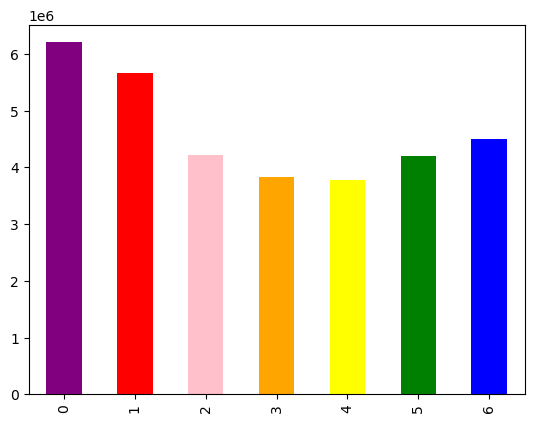

In [4]:
#Create a bar chart
ords_prod['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

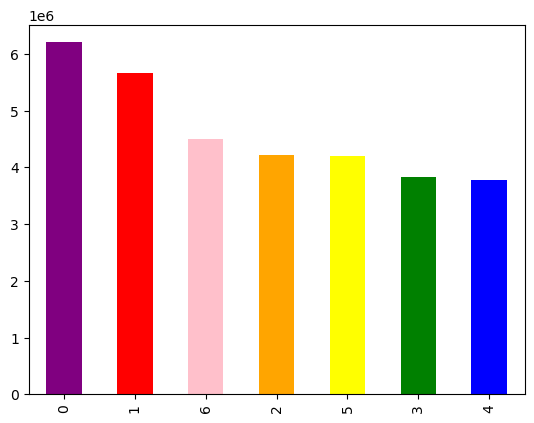

In [5]:
#assign the chart to a variable
bar = ords_prod['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
#export the chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

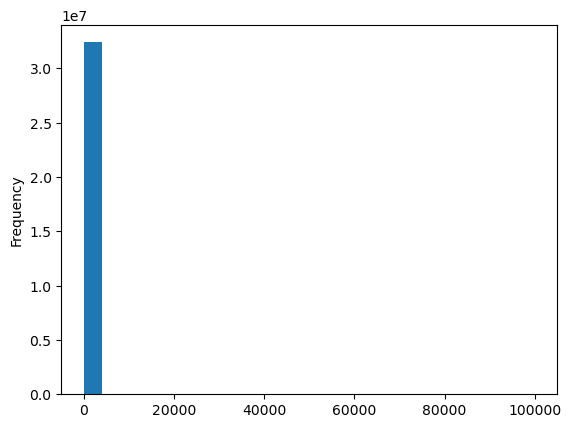

In [6]:
#create a histogram
ords_prod['prices'].plot.hist(bins=25)

In [7]:
#review descriptive stats to see figure out why the histogram looks unexpected
ords_prod['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

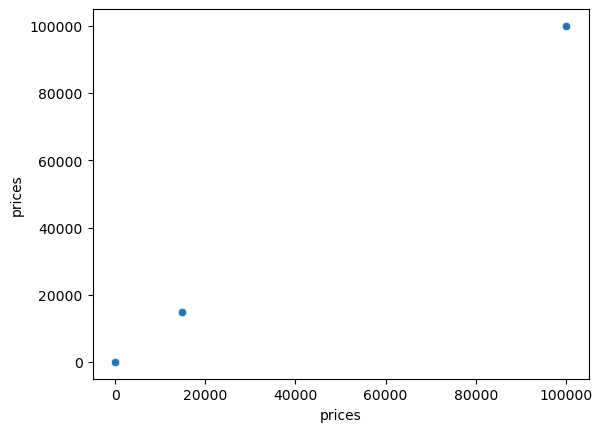

In [8]:
#create a scatter plot to continue invistigation into prices
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prod)

In [11]:
ords_prod.loc[ords_prod['prices']>100]

,order_id,user_id,Cust_order_num,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,price_range_loc,busiest_day,busiest_days,hour_busyness,max_order,loyalty_flag,mean_price,spend_flag,median_days_since_last,frequency_flag


In [2]:
ords_prod.loc[ords_prod['prices'] >100, 'prices'] = np.nan

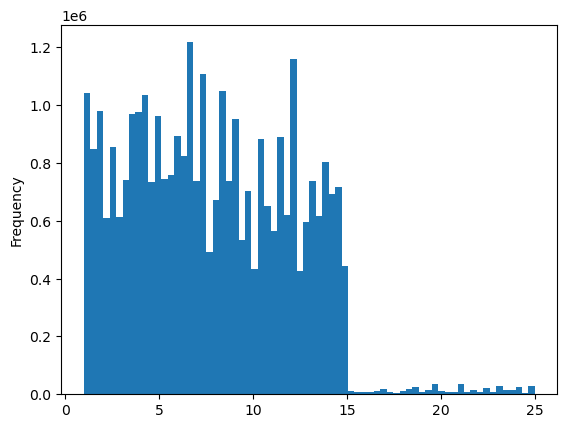

In [3]:
#create a histogram with cleaned data
hist = ords_prod['prices'].plot.hist(bins=70)

In [5]:
ords_prod['prices'].describe().to_clipboard()

In [10]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

exploring creating a random sample from a data stet

In [14]:
np.random.seed(4)
dev = np.random.rand(len(ords_prod)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
big = ords_prod[dev]
small = ords_prod[~dev]

In [17]:
df_2 = small[['prices', 'orders_day_of_week']]

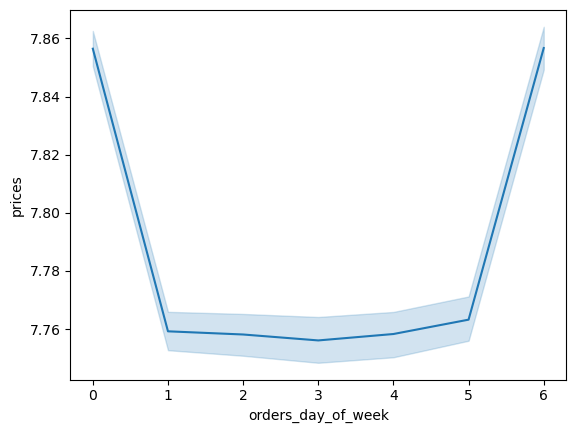

In [18]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [1]:
#code to create a line chart on the whole data set

#df_prices = ords_prod[['prices', 'orders_day_of_week']]
#line_prices = sns.lineplot(data = df_prices, x = 'orders_day_of_week', y = 'prices')

In [19]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))